In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

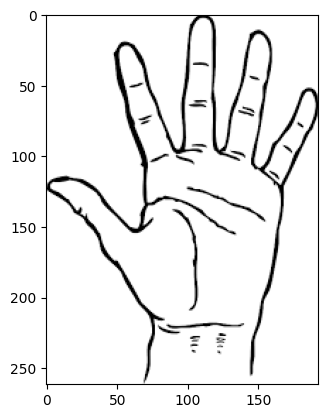

In [ ]:
# Load  image
img = cv2.imread('hand.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)
plt.imshow(img)

In [ ]:
#Compute Hessian matrix components.
def hessian_matrix(x, y, img, sigma=1):

    Dxx = gaussian_filter(img, sigma=sigma, order=(2, 0))
    Dyy = gaussian_filter(img, sigma=sigma, order=(0, 2))
    Dxy = gaussian_filter(img, sigma=sigma, order=(1, 1))
    return Dxx[x, y], Dyy[x, y], Dxy[x, y]

def hessian_determinant(x, y, img, sigma=1.5):
    #Hessian determinant.
    Dxx, Dyy, Dxy = hessian_matrix(x, y, img, sigma)
    return (Dxx * Dyy) - (0.9 * Dxy ** 2)

In [ ]:
 #Detect keypoints using Hessian determinant.
def detect_keypoints(img, threshold=10):

    keypoints = []
    for x in range(1, img.shape[0] - 1, 2):
        for y in range(1, img.shape[1] - 1, 2):
            det = hessian_determinant(x, y, img)
            if det > threshold:
                keypoints.append((x, y))
    return keypoints

In [ ]:
 #Assign orientation to each keypoint based on gradient direction.
def assign_orientation(img, keypoints, window_size=3):

    orientations = []
    for (x, y) in keypoints:
        gx = img[x + 1, y] - img[x - 1, y]
        gy = img[x, y + 1] - img[x, y - 1]
        orientation = np.arctan2(gy, gx)
        orientations.append(orientation)
    return orientations

In [ ]:
#Generate descriptors for each keypoint.
def generate_descriptors(img, keypoints, orientations, size=4):

    descriptors = []
    for i, (x, y) in enumerate(keypoints):
        angle = orientations[i]
        descriptor = []
        for dx in range(-size, size):
            for dy in range(-size, size):
                # Rotate around keypoint
                nx = int(x + dx * np.cos(angle) - dy * np.sin(angle))
                ny = int(y + dx * np.sin(angle) + dy * np.cos(angle))

                # Ensure indices are within bounds
                if 1 <= nx < img.shape[0] - 1 and 1 <= ny < img.shape[1] - 1:
                    gx = img[nx + 1, ny] - img[nx - 1, ny]
                    gy = img[nx, ny + 1] - img[nx, ny - 1]
                    descriptor.append(gx)
                    descriptor.append(gy)

        descriptors.append(np.array(descriptor))
    return descriptors

In [ ]:
# Step 1: Detect keypoints
keypoints = detect_keypoints(img_gray)

# Step 2: Assign orientation to each keypoint
orientations = assign_orientation(img_gray, keypoints)

# Step 3: Generate descriptors
descriptors = generate_descriptors(img_gray, keypoints, orientations)

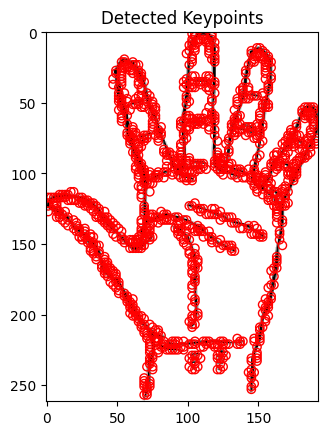

Number of keypoints detected: 1134
Sample descriptor (first keypoint): [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  -62.  -49. -255. -240.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.  -39.  -62. -255. -255. -206. -193.    0.    0.    0.    0.
    0.    0.    0.    0.   -9.  -39. -240. -255. -193. -216.    0.    0.
    0.    0.    0.    0.    0.    0.    0.   -9. -148. -240. -216. -246.
    0.  -15.  205.  225.]


In [ ]:
# Display detected keypoints
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for (x, y) in keypoints:
    plt.scatter(y, x, facecolors='none', edgecolors='r')
plt.title('Detected Keypoints')
plt.show()

# number of keypoints and a sample descriptor
print("Number of keypoints detected:", len(keypoints))
print("Sample descriptor (first keypoint):", descriptors[0] if descriptors else "No descriptors")
